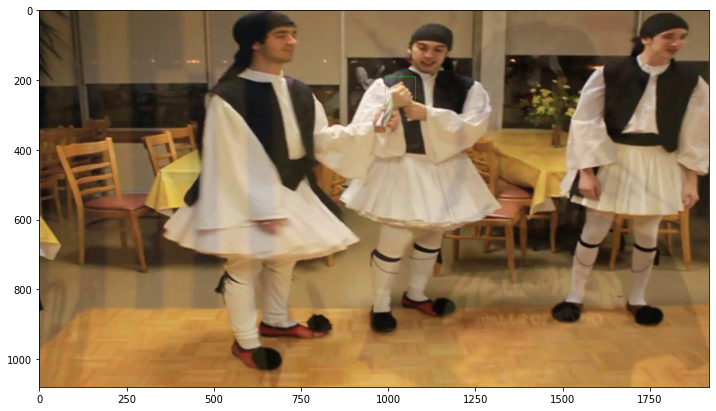

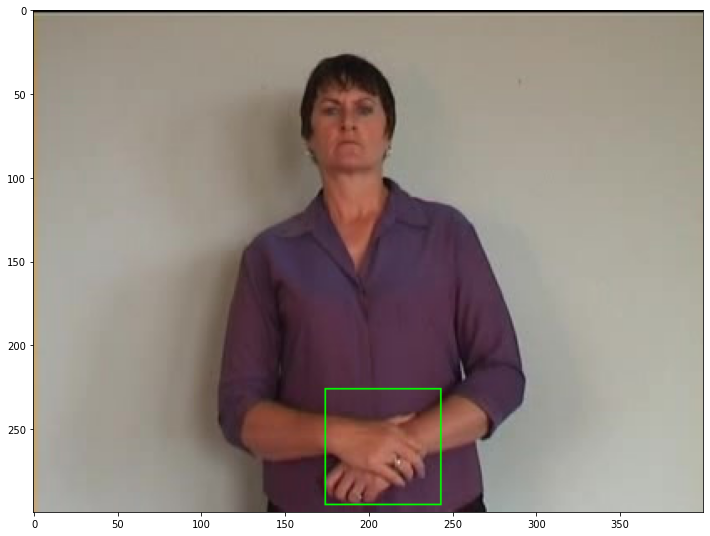

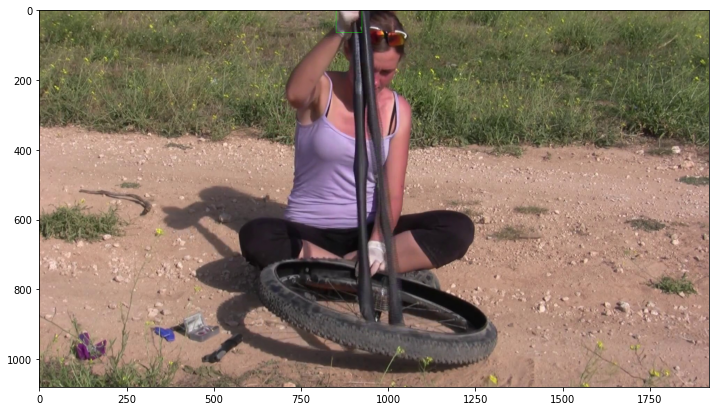

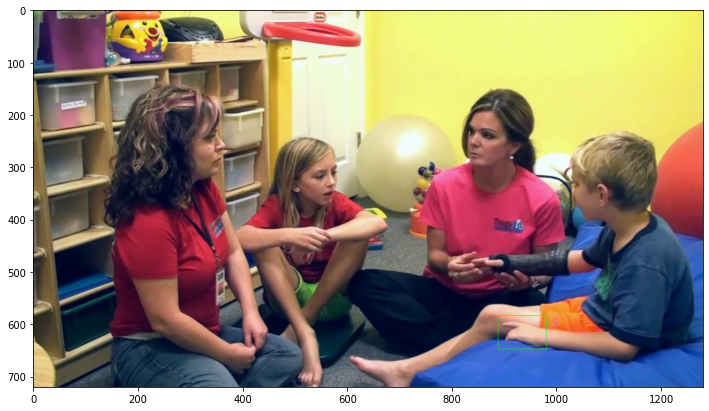

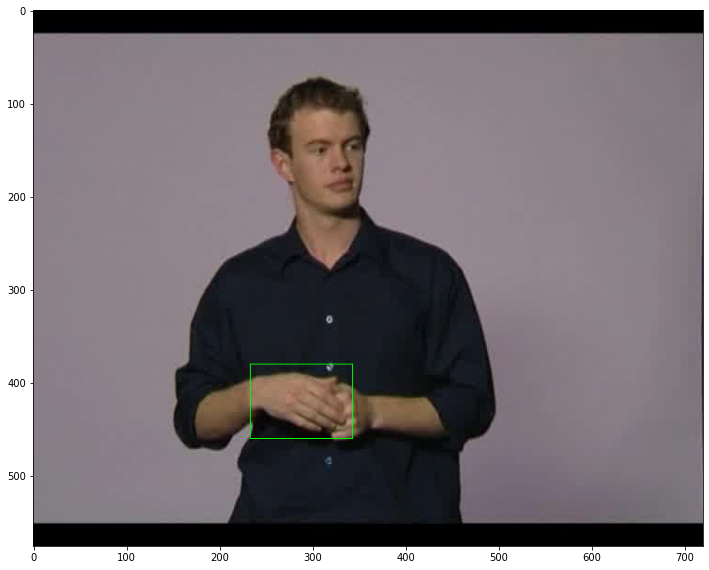

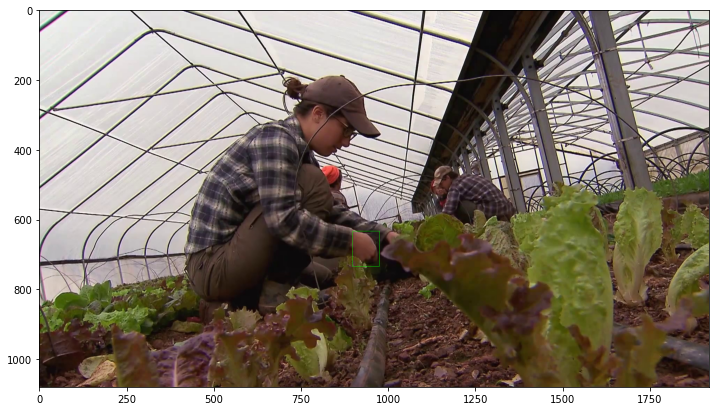

In [1]:
import json
import os 
import cv2
# %pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = './manual_test/'
list_json = [file for file in os.listdir(path) if ".json" in file]

for i,file_json in enumerate(list_json):
    f = open(path+file_json)
    annotation = json.load(f)
    point = annotation['hand_pts']
#     print(file_json)
    
    # Get all point x and y 
    x_list = [tick[0] for tick in point]
    y_list = [tick[1] for tick in point]
    
    x_min = min(x_list)
    x_max = max(x_list)

    y_min = min(y_list)
    y_max = max(y_list)
    
#     center_x , center_y = annotation['hand_box_center']

    file_image = file_json.replace('.json','.jpg')
    img = mpimg.imread(path+file_image)
    
    cv2.rectangle(img, (int(x_min-10), int(y_min-16)), (int(x_max+10), int(y_max)+10), color=(0, 255, 0), thickness =1)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    
    if i == 5:
        break
#     for tick in point:
#     x_list.append(tick[0])
#     y_list.append(tick[1])
    

In [2]:
dataset = {}
dataset['info'] = {} 
dataset['info']["contributor"] = "Vin-AI Lab"
dataset['info']["date_created"] = '4/5/2020' 
dataset['info']["description"] = "Hand-Dataset-Testing" 
dataset['info']["url"] = "https://github.com/oggyfaker"
dataset['info']["Version"] = "1.0"
dataset['info']["year"] = "2020"


license = {} 
license['id'] = 1 
license['name'] = "VinAi Lab"
license['url'] = "https://github.com/oggyfaker"
dataset["licenses"] = []
dataset["licenses"].append(license)
print(dataset)



{'info': {'contributor': 'Vin-AI Lab', 'date_created': '4/5/2020', 'description': 'Hand-Dataset-Testing', 'url': 'https://github.com/oggyfaker', 'Version': '1.0', 'year': '2020'}, 'licenses': [{'id': 1, 'name': 'VinAi Lab', 'url': 'https://github.com/oggyfaker'}]}


In [3]:
# Create dictionary of name and height and weight
path = './manual_test/'
list_image = [file for file in os.listdir(path) if ".jpg" in file]

import cv2
image_dict = {}
for image_item in list_image:
    h, w, c  = (cv2.imread(path+image_item)).shape
    image_dict[image_item] = [w,h]

In [4]:
dataset['image'] = []
for i,image_name in enumerate(image_dict):
    dict_tmp = {}
    dict_tmp['file_name'] = image_name
    dict_tmp['width'] ,dict_tmp['height'] = image_dict[image_name]
    dict_tmp["id"] = i 
    dict_tmp['license'] = 1
    dict_tmp["flickr_url"] = ""
    dict_tmp["coco_url"] = ""
    dict_tmp["date_captured"] = "15/5/2020"
    dataset['image'].append(dict_tmp)

In [5]:
dataset['image'][0]

{'file_name': '012162289_01_l.jpg',
 'width': 1280,
 'height': 720,
 'id': 0,
 'license': 1,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': '15/5/2020'}

In [6]:
# Category 
dict_temp_cat = {}
dict_temp_cat['id'] = 1 
dict_temp_cat['name'] = "hand"
dict_temp_cat["supercategory"] = "Body"

dataset['categories'] = []
dataset['categories'].append(dict_temp_cat)

dataset['categories']

[{'id': 1, 'name': 'hand', 'supercategory': 'Body'}]

In [7]:
dataset['annotation'] = []
count_id = 0

for item_image in list_image:
    if ".jpg" in item_image:
        file_json = item_image.replace(".jpg",".json")
#         data = loadmat('../hand_dataset/training_dataset/training_data/annotations/'+ file_math)
        f = open(path+file_json)
        annotation = json.load(f)
        point = annotation['hand_pts']
        
        x_list = [tick[0] for tick in point]
        y_list = [tick[1] for tick in point]
    
        x_min = min(x_list) - 10
        x_max = max(x_list) + 16

        y_min = min(y_list) - 11
        y_max = max(y_list) + 11
        
        width = x_max - x_min 
        height = y_max - y_min 
        
        dict_anotate_temp = {}
        dict_anotate_temp['id'] = count_id
        count_id += 1 
        # 1 == hand 
        dict_anotate_temp["category_id"] = 1 
        
        for image in dataset['image']:
            if image['file_name'] == item_image:
                id_image = image['id']
                break 
                
        dict_anotate_temp["image_id"] = id_image
        dict_anotate_temp["iscrowd"] = 0
        dict_anotate_temp["segmentation"] = [[]]
        dict_anotate_temp["area"] = width *  height
        dict_anotate_temp["bbox"] = [x_min,y_min,width,height]
        
        dataset['annotation'].append(dict_anotate_temp)
        
        

In [8]:
import json
with open("./Result Json/CMU_test2020.json", "w") as outfile: 
    json.dump(dataset, outfile)
    